# Notebook to evaluate *ritme* trials tracked with MLflow

This notebook shows how the output from the method `find_best_model_config` of the *ritme* package can be evaluated when the experiments are tracked with MLflow.

The only user inputs required are the path to the MLflow logs (variable `log_folder_location`) and the name of the experiment (variable `experiment_name`). For reproducibility the exact experiment is rerun (section [Run experiment](#run-experiment)) if it does not exist yet (depending on your compute power this might take a while to run).


## Setup

In [1]:
import warnings

import mlflow

from ritme.evaluate_mlflow import (
    barplot_metric,
    parallel_coordinates_plot,
    plot_complexity_vs_metric,
    violinplot_metric,
    plot_metric_history_per_model_type,
    plot_avg_history_per_model_type,
    extract_run_config,
)

warnings.filterwarnings("ignore", category=FutureWarning)

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
######## USER INPUTS ########

# path to MLflow logs
log_folder_location = "trials_mlflow/mlruns"
# name of the experiment
experiment_name = "trials_mlflow"

######## END USER INPUTS #####

## Run experiment

In [3]:
! ./run_experiment_mlflow.sh

find: trials_mlflow: No such file or directory
You can view the model logs by launching MLflow UI from within folder : trials_mlflow.
Ray Tune training of: linreg...
Using these resources: CPU 1
Using these resources: GPU 0
2025-06-08 21:28:08,417	INFO worker.py:1821 -- Started a local Ray instance.
Ray cluster resources: {'CPU': 8.0, 'object_store_memory': 2147483648.0, 'node:127.0.0.1': 1.0, 'memory': 4489698919.0, 'node:__internal_head__': 1.0}
Dashboard URL at: 
2025-06-08 21:28:10,635	WARNING optuna_search.py:350 -- You passed an initialized sampler to `OptunaSearch`. The `seed` parameter has to be passed to the sampler directly and will be ignored.
[I 2025-06-08 21:28:10,635] A new study created in memory with name: optuna
╭──────────────────────────────────────────────────────────╮
│ Configuration for experiment     linreg                  │
├──────────────────────────────────────────────────────────┤
│ Search algorithm                 SearchGenerator         │
│ Scheduler      

## Insights on performance per model type

In [4]:
# extract all trial information
mlflow.set_tracking_uri(log_folder_location)

all_trials = mlflow.search_runs(
    order_by=["metrics.rmse_val ASC"], search_all_experiments=True
)

print(f"Found {all_trials.shape[0]} trials")

Found 14 trials


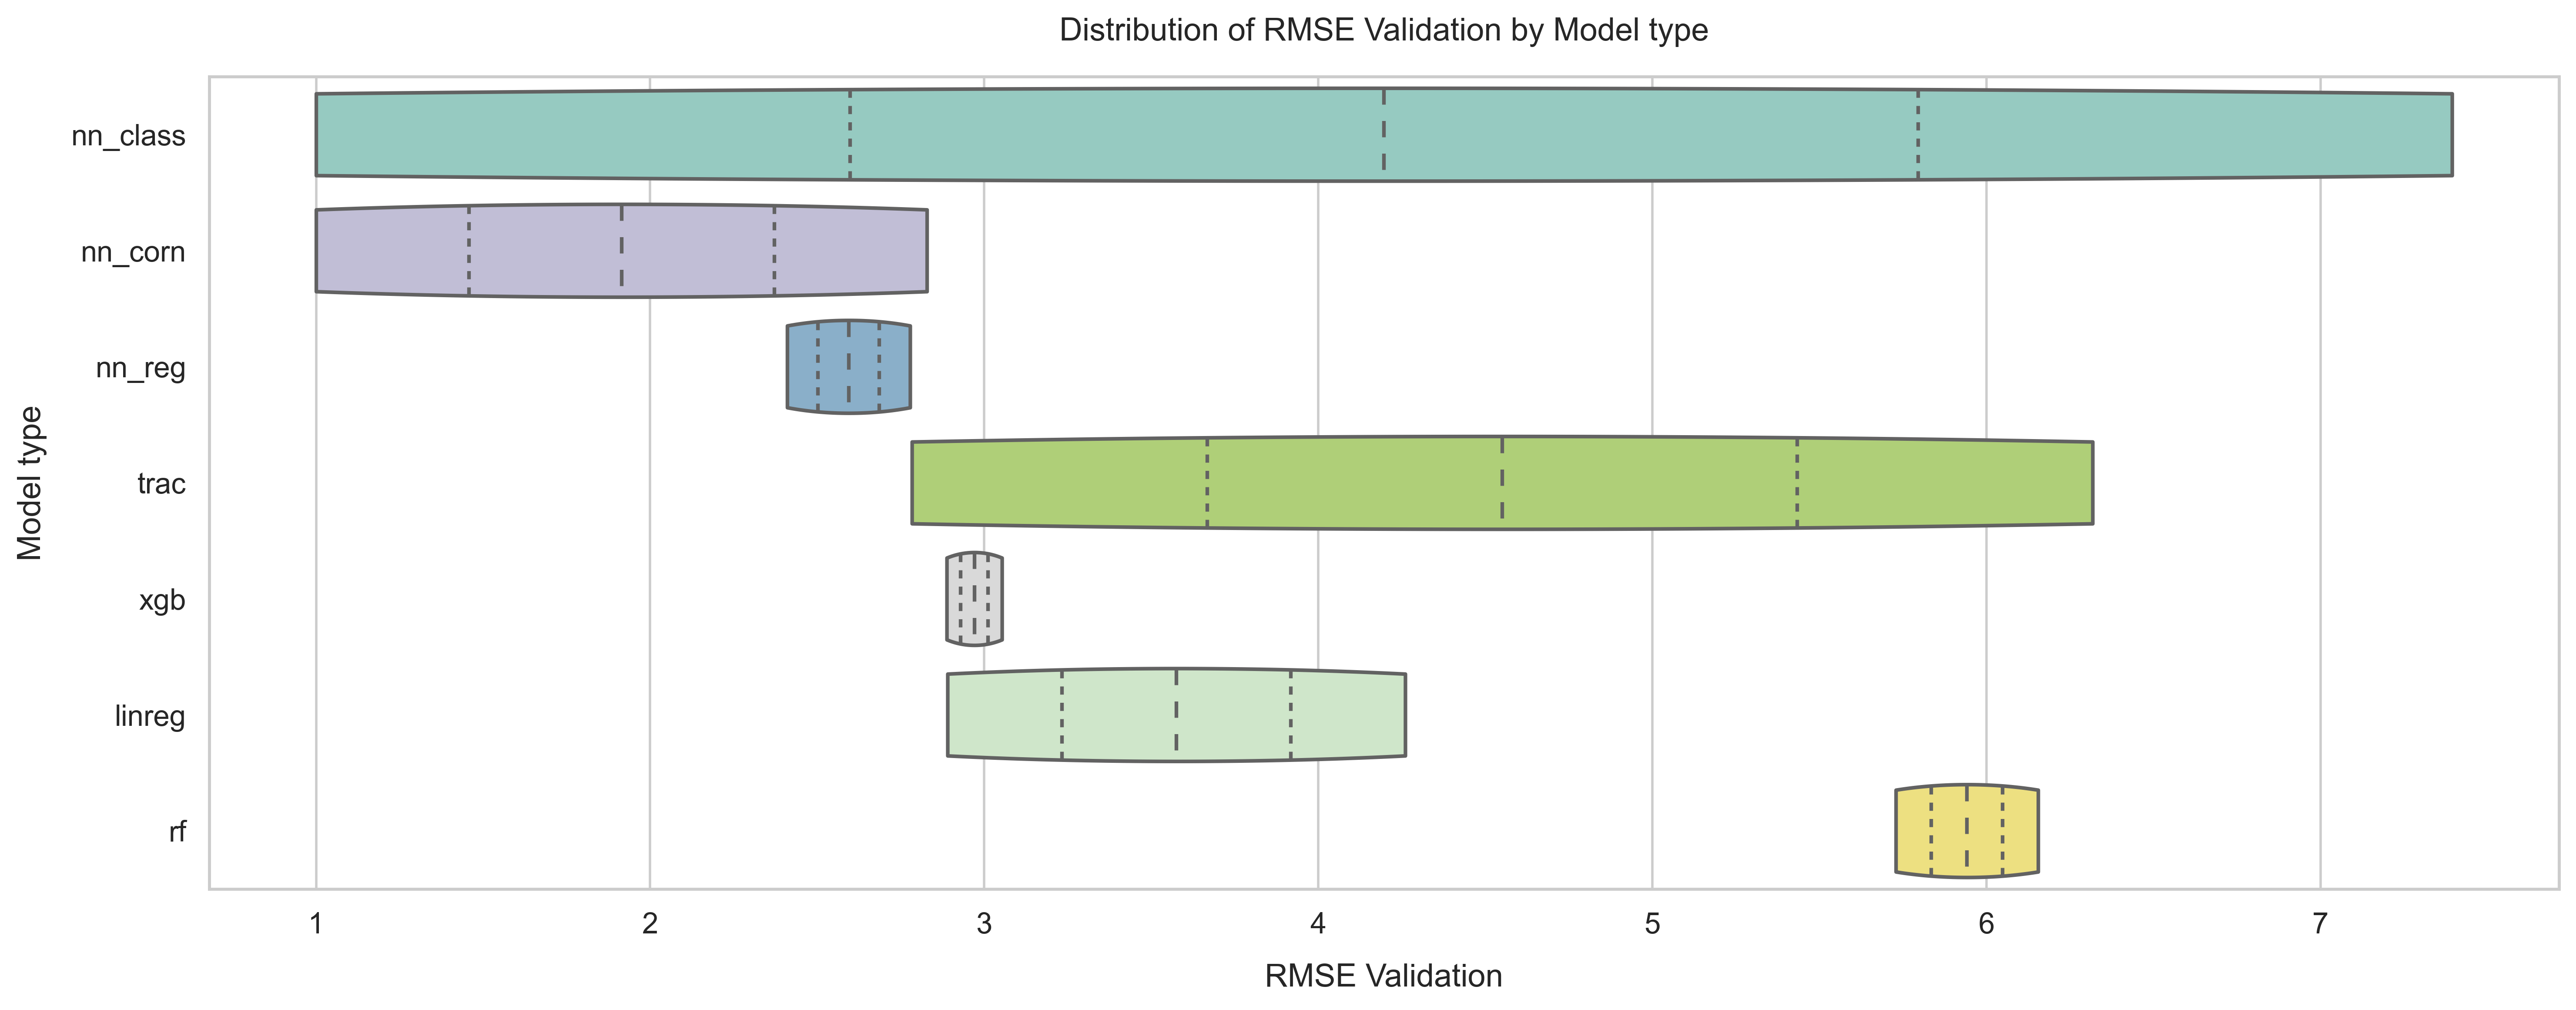

In [5]:
violinplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col="params.model",
    group_name="Model type",
)

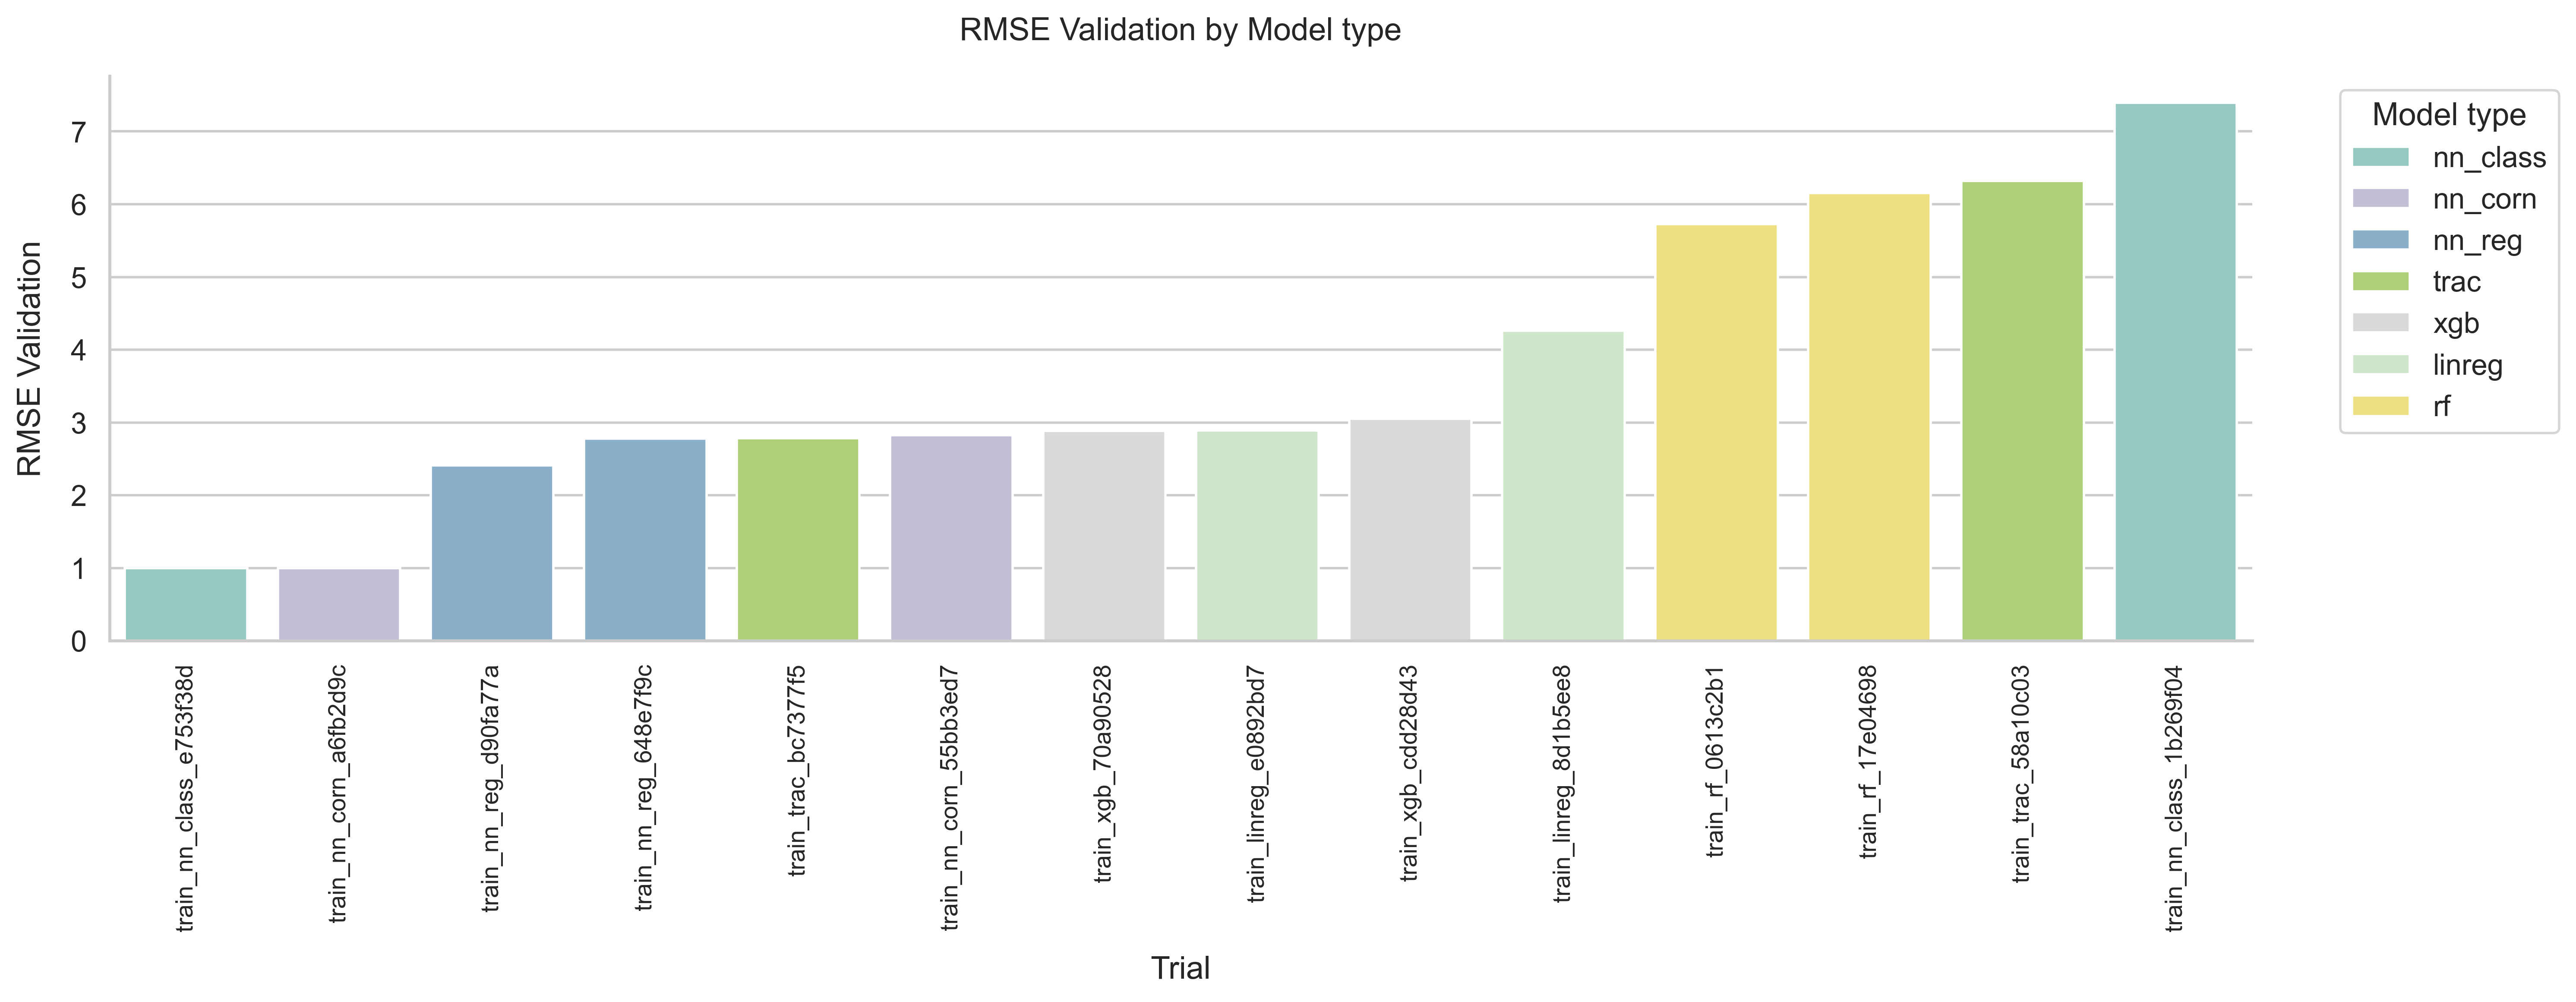

In [6]:
barplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col="params.model",
    group_name="Model type",
    display_trial_name=True,  # if true display trial name on the x-axis
    top_n=None,  # to plot top N models, set to an integer value
)

## Model complexity vs. performance

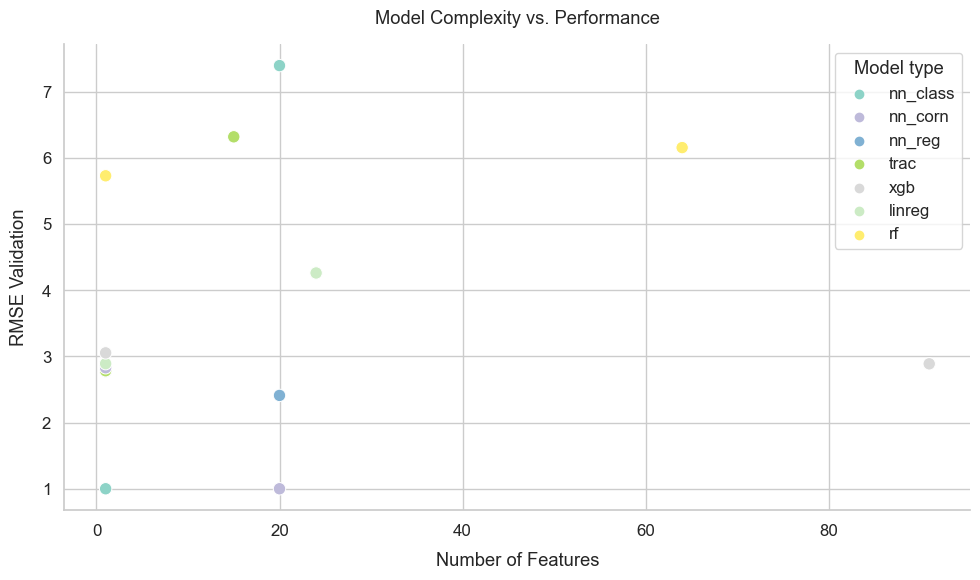

In [7]:
plot_complexity_vs_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col="params.model",
    group_name="Model type",
    static=True,  # Set to False for interactive plotly graph
)

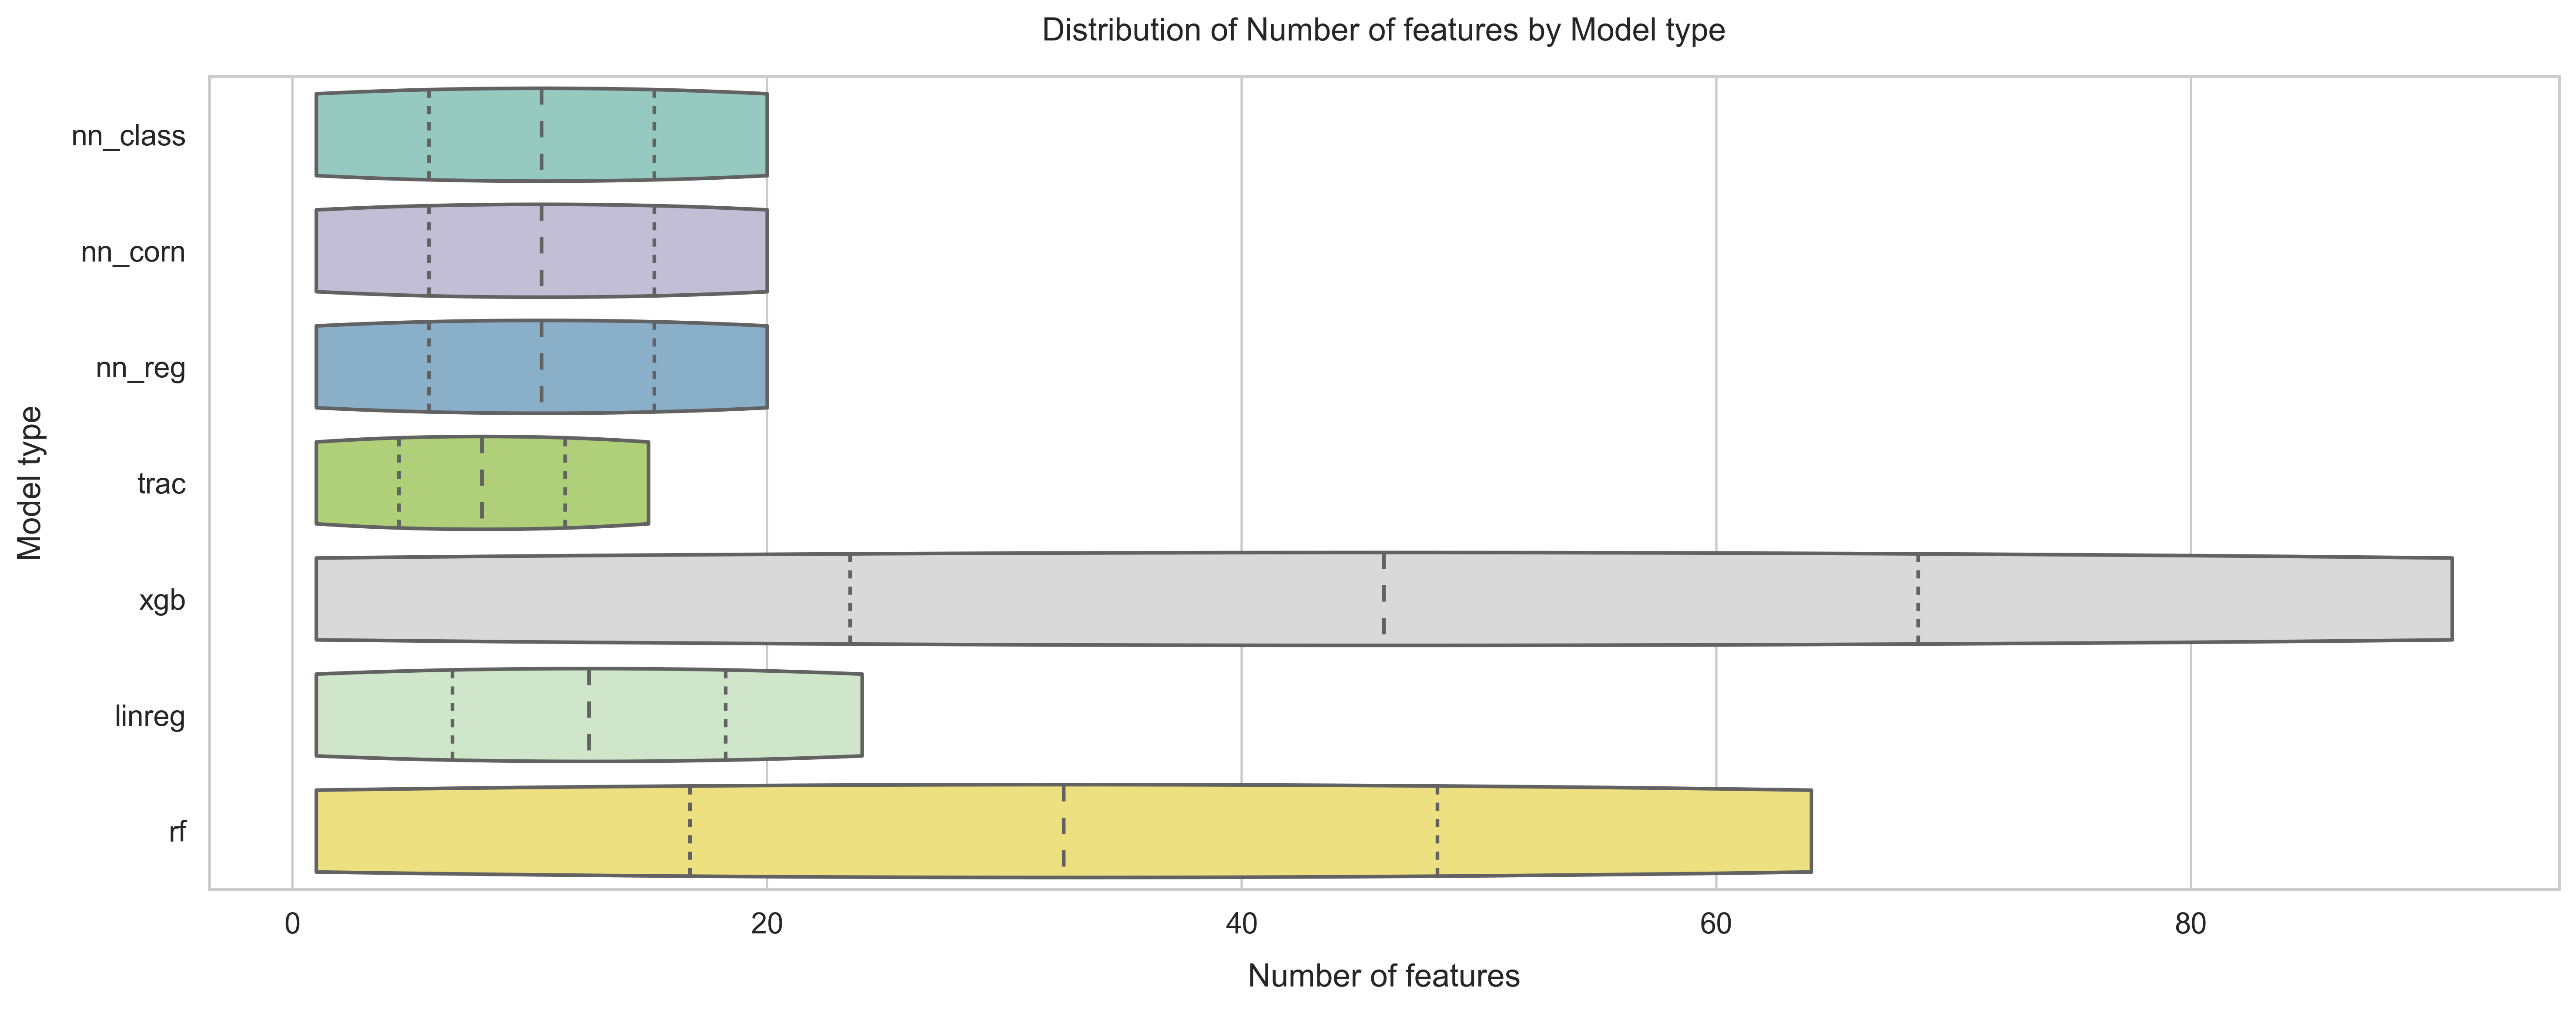

In [8]:
violinplot_metric(
    all_trials,
    metric_col="metrics.nb_features",
    metric_name="Number of features",
    group_col="params.model",
    group_name="Model type",
)

In [9]:
first_metric_col = "metrics.nb_features"
first_metric_name = "# features"
parallel_coordinates_plot(all_trials, first_metric_col, first_metric_name)

## Performance vs. feature engineering

### Effect of data transformation

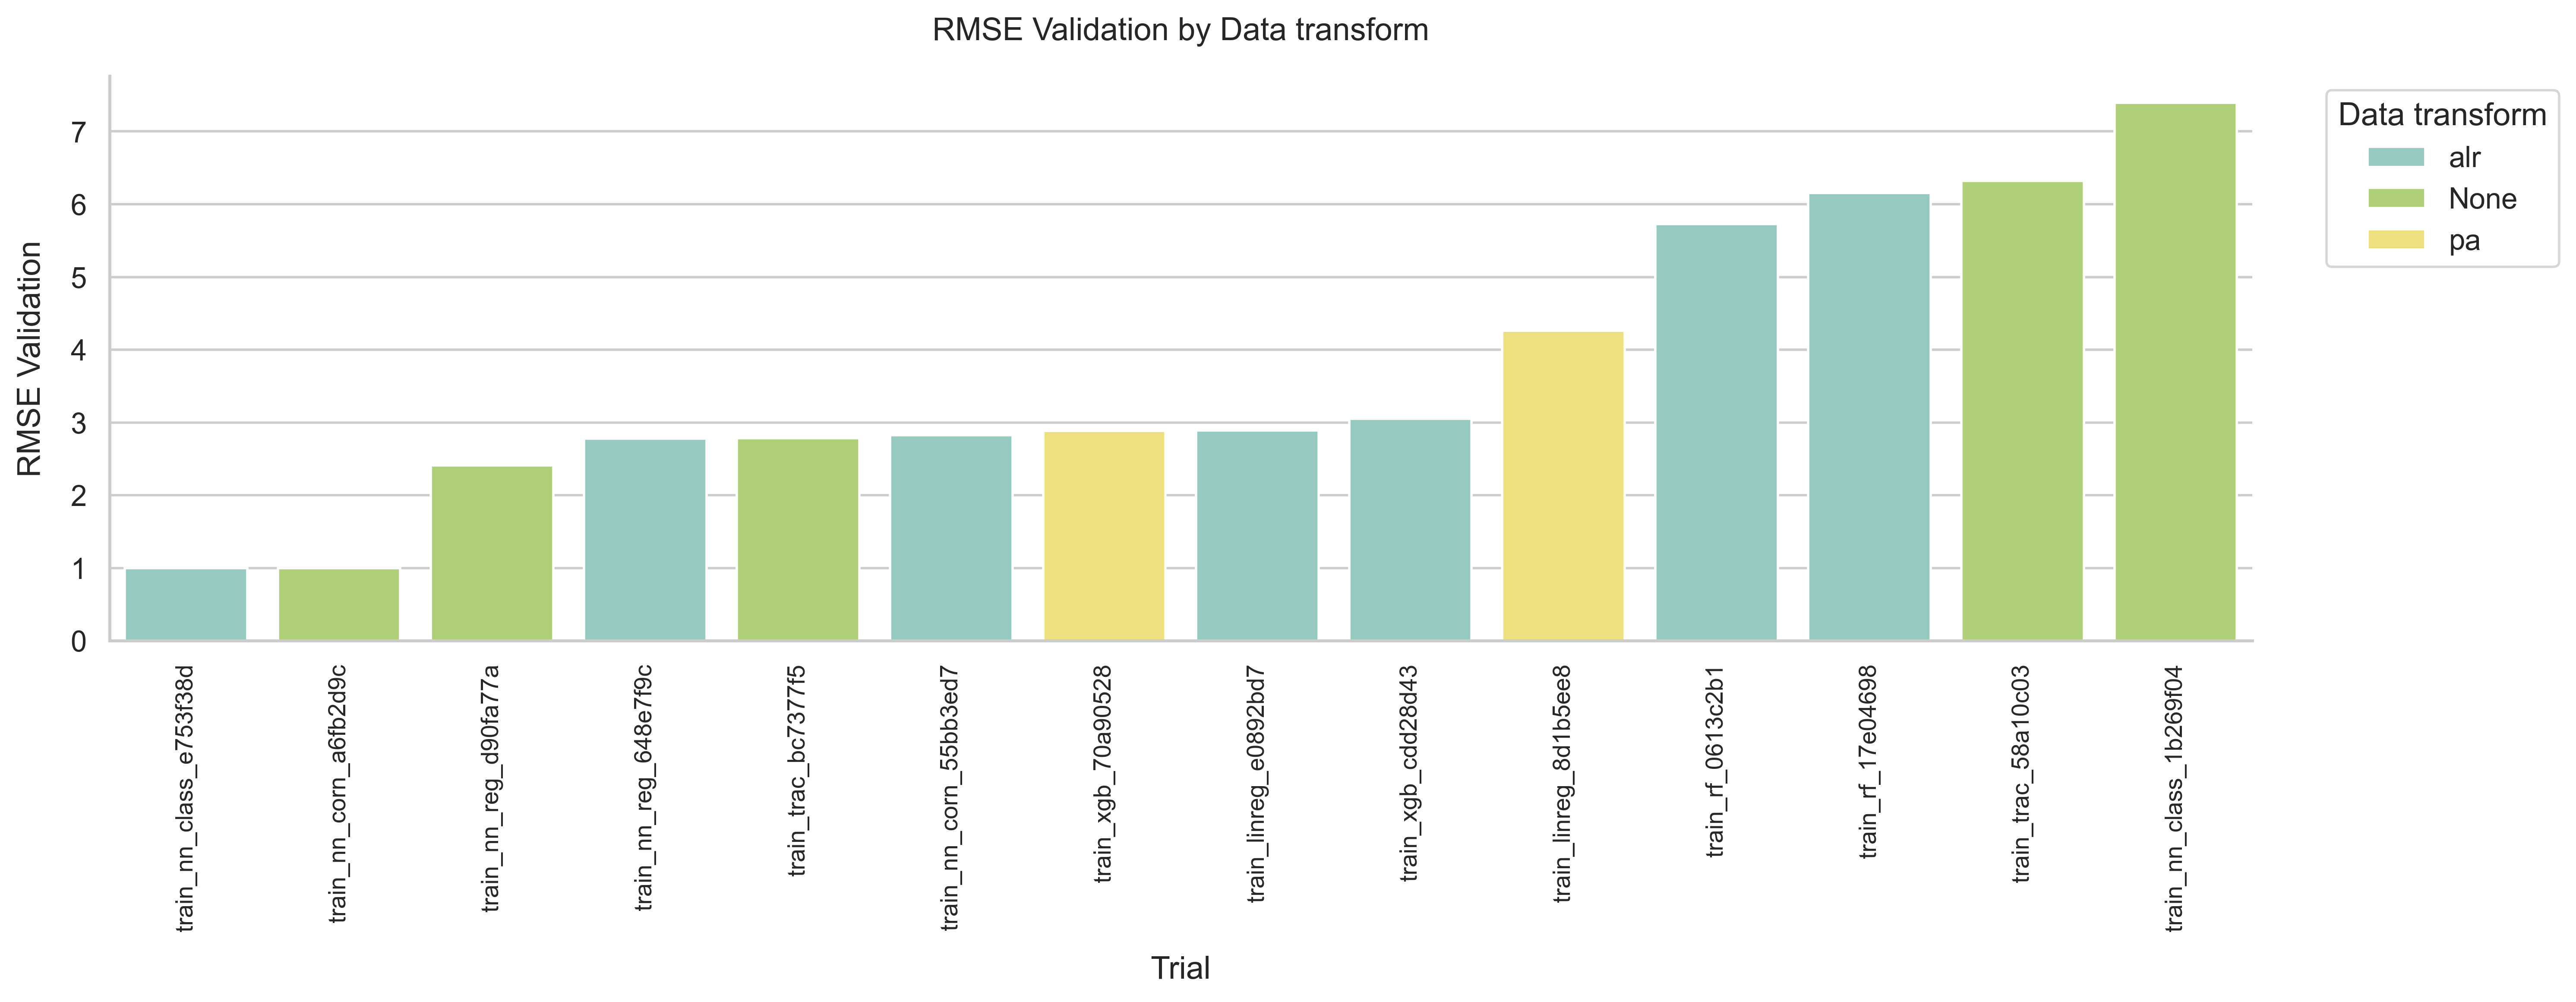

In [10]:
var = "params.data_transform"
var_name = "Data transform"

barplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
    display_trial_name=True,  # if true display trial name on the x-axis
    top_n=None,  # to plot top N models, set to an integer value
)

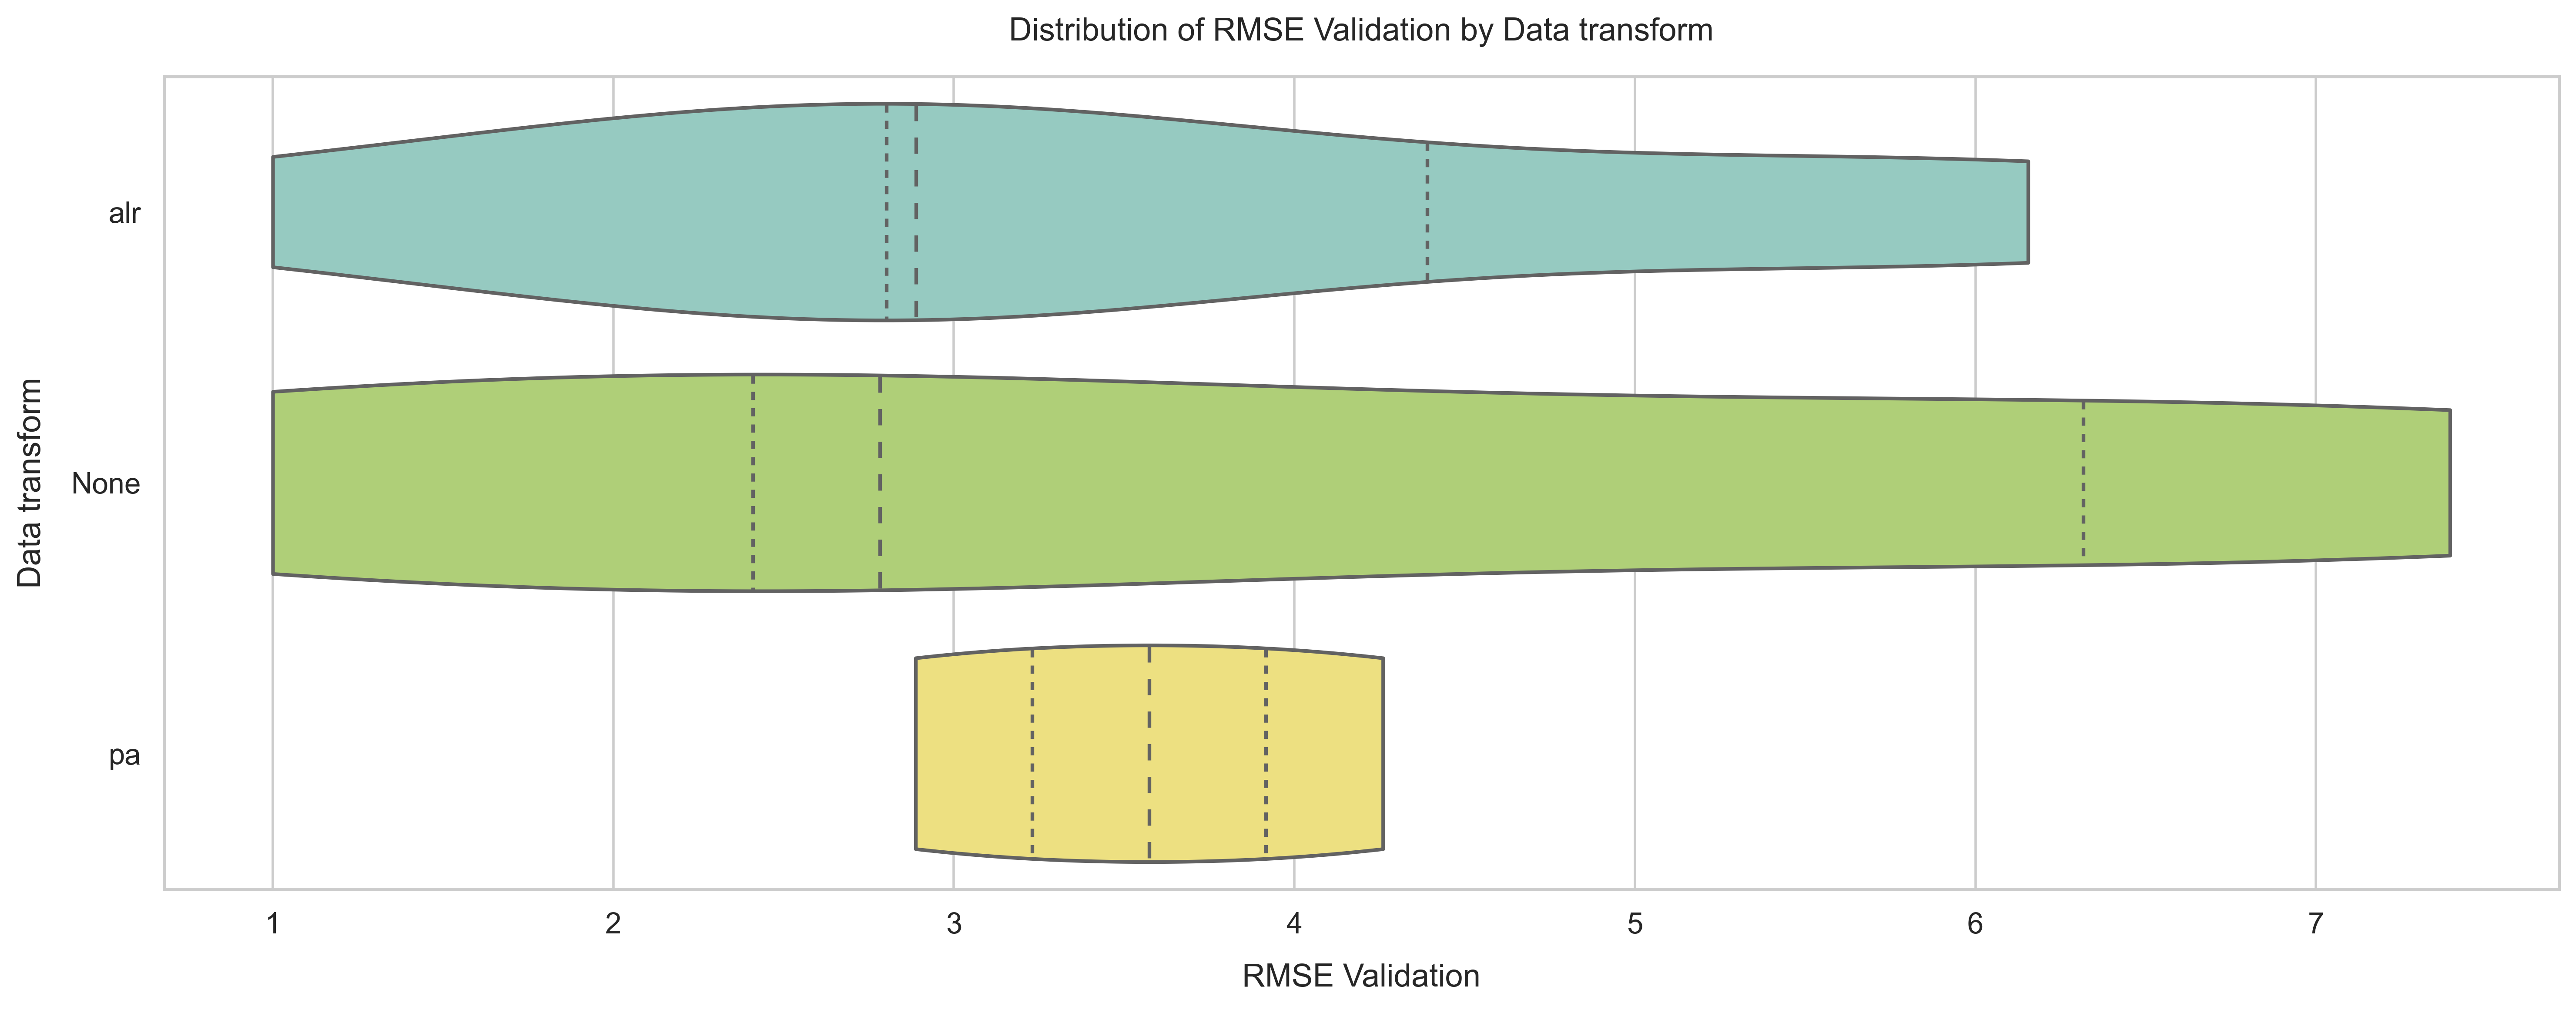

In [11]:
violinplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
)

In [12]:
parallel_coordinates_plot(all_trials, var, var_name, first_metric_cat=True)

### Effect of data selection

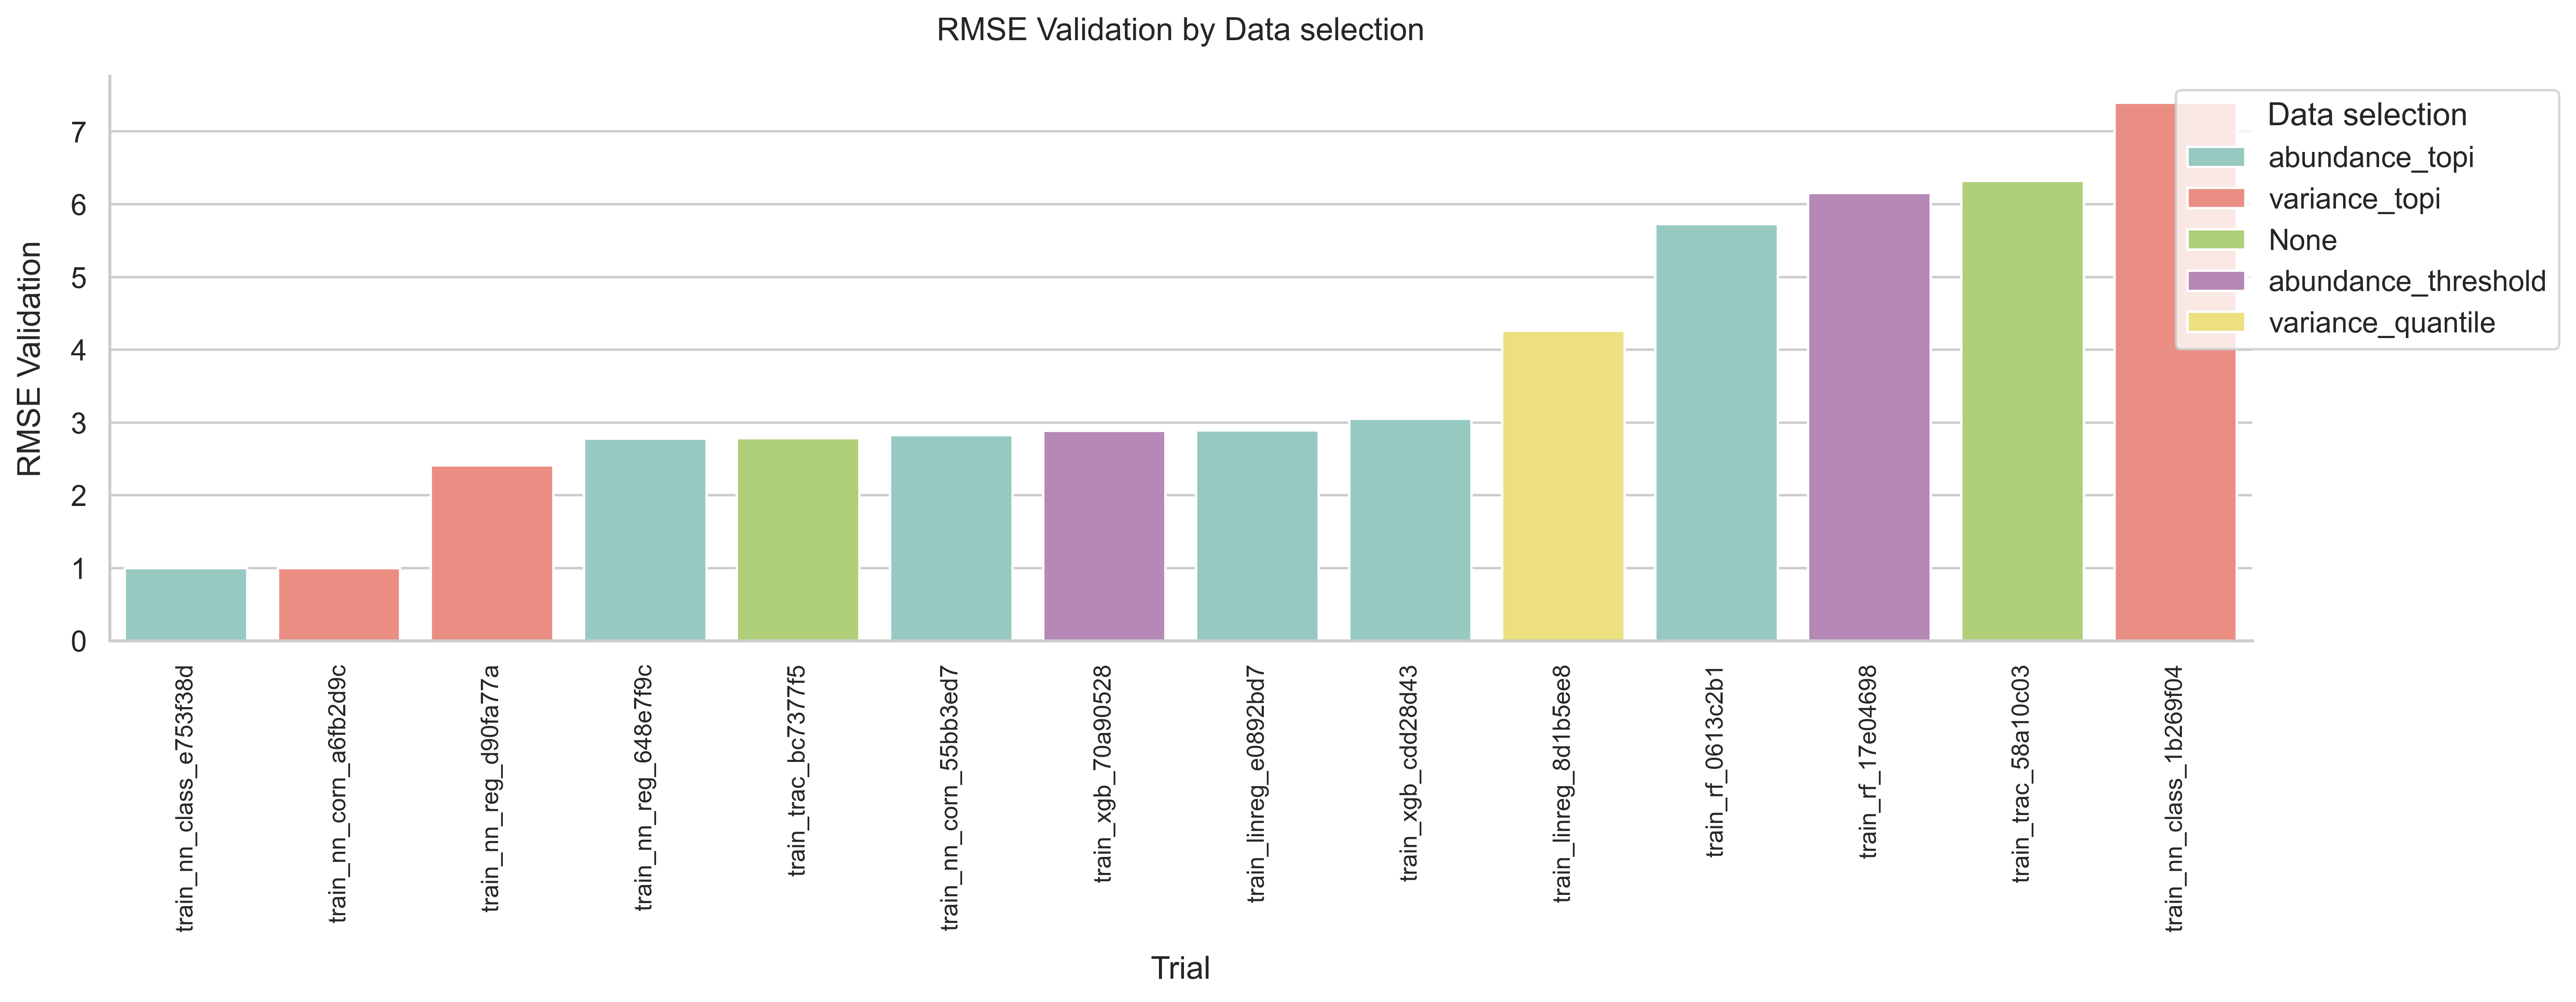

In [13]:
var = "params.data_selection"
var_name = "Data selection"

barplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
    display_trial_name=True,  # if true display trial name on the x-axis
    top_n=None,  # to plot top N models, set to an integer value
)

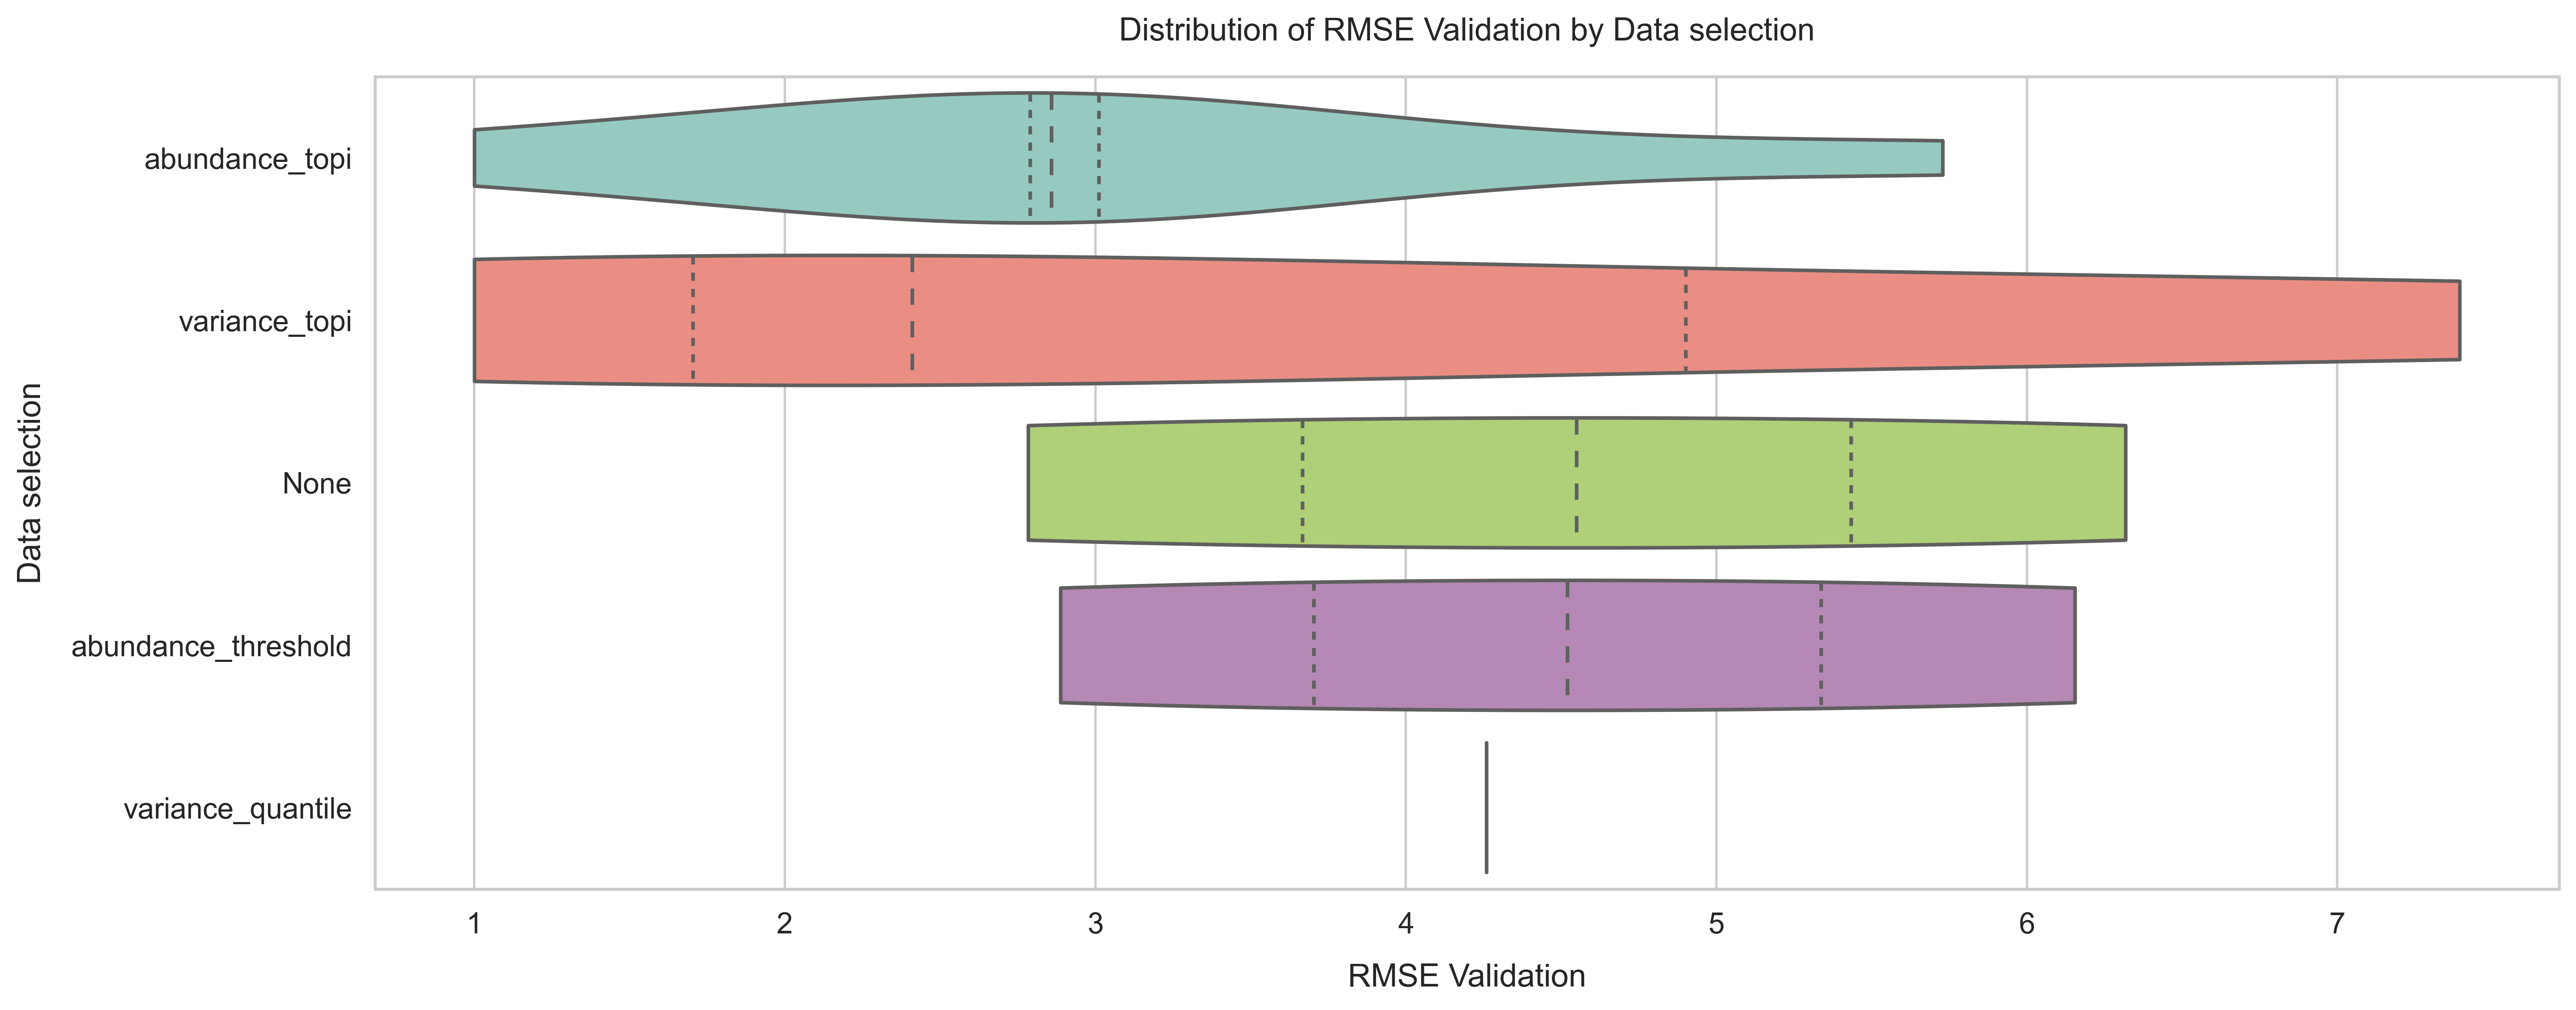

In [14]:
violinplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
)

In [15]:
parallel_coordinates_plot(all_trials, var, var_name, first_metric_cat=True)

### Effect of data aggregation

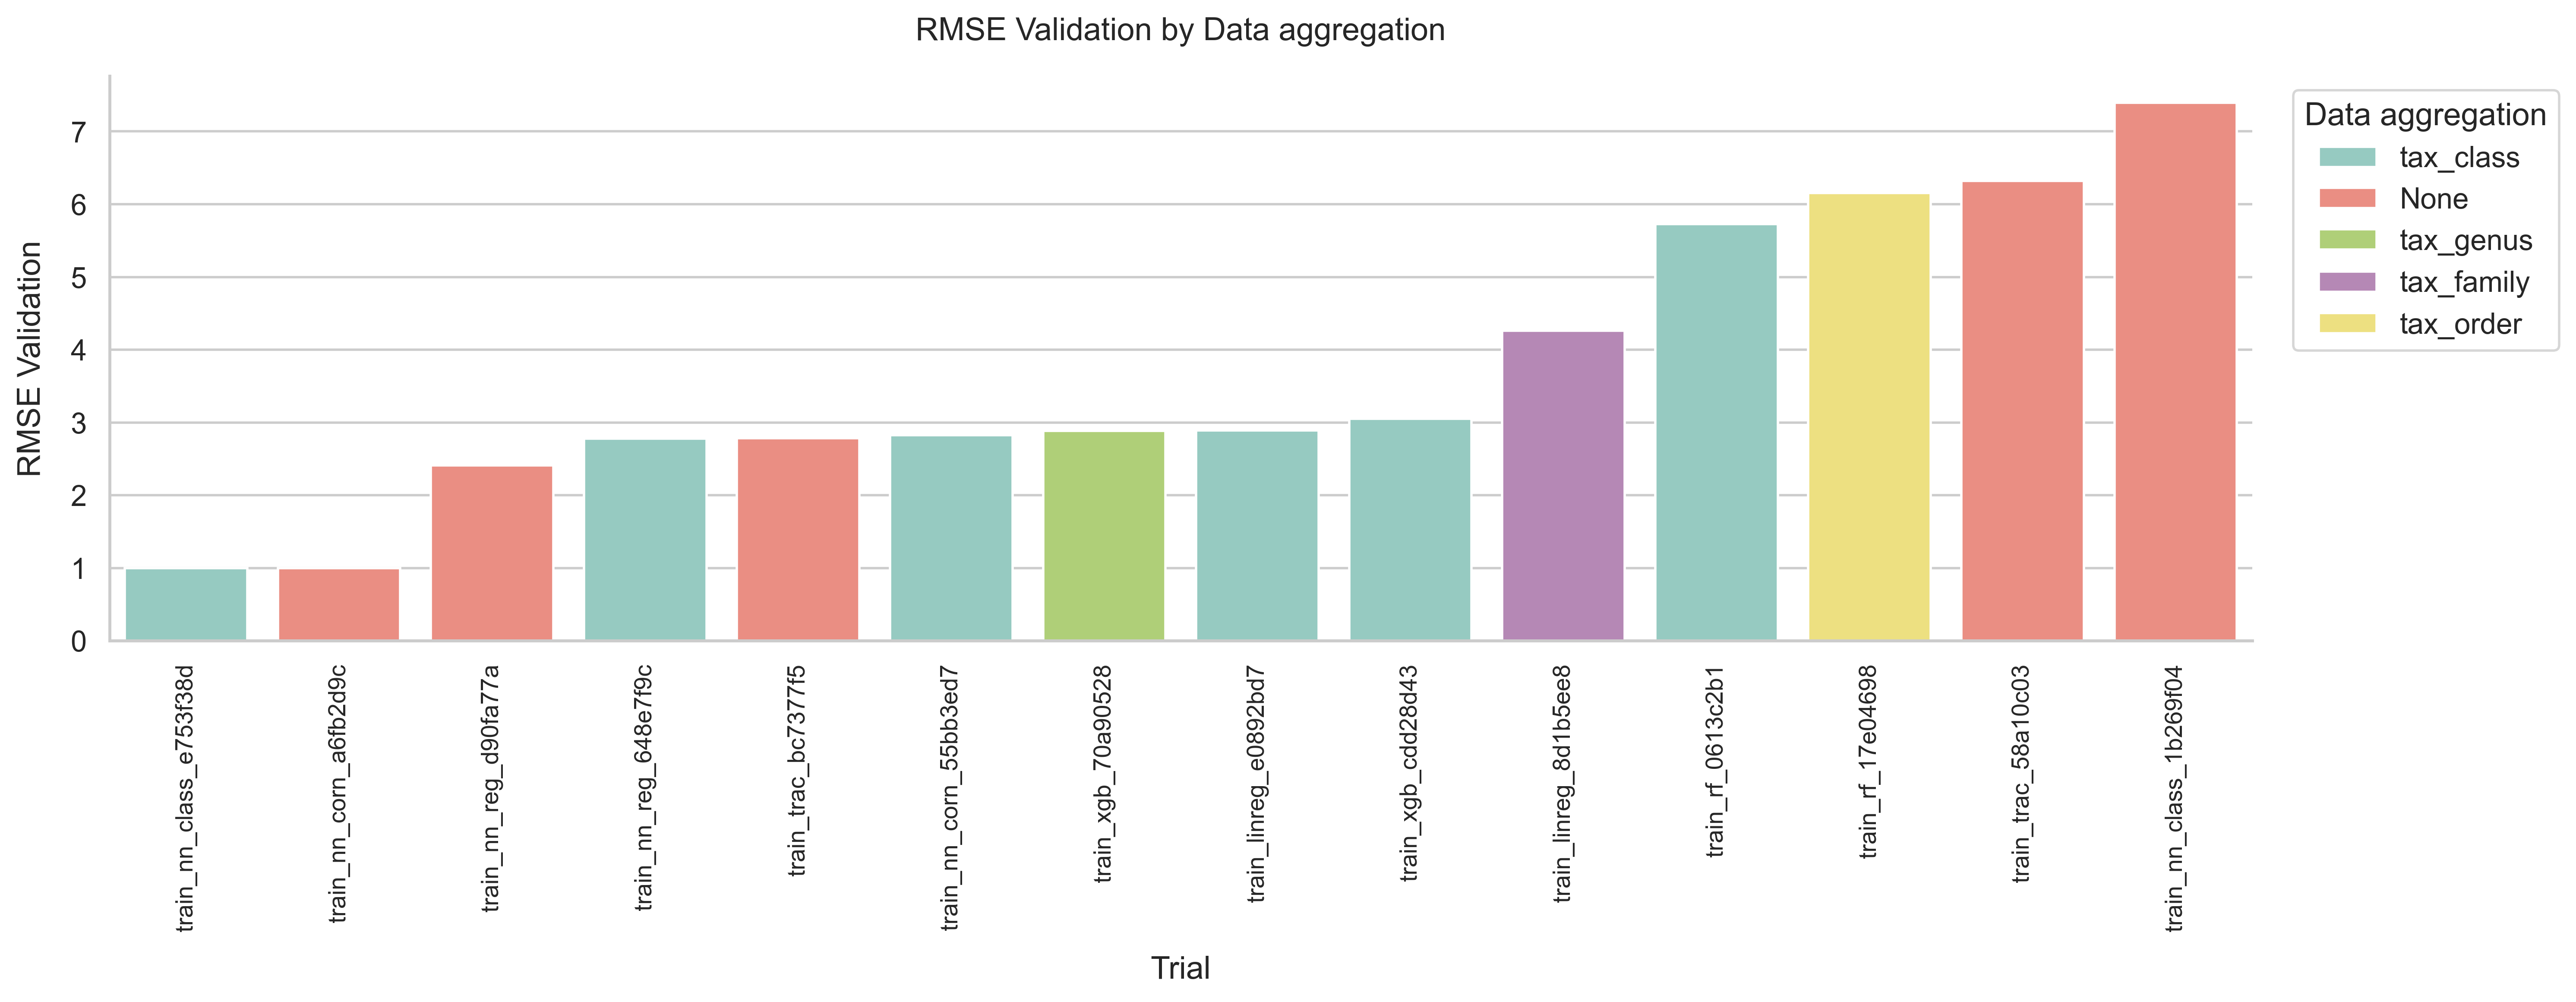

In [16]:
var = "params.data_aggregation"
var_name = "Data aggregation"

barplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
    display_trial_name=True,  # if true display trial name on the x-axis
    top_n=None,  # to plot top N models, set to an integer value
)

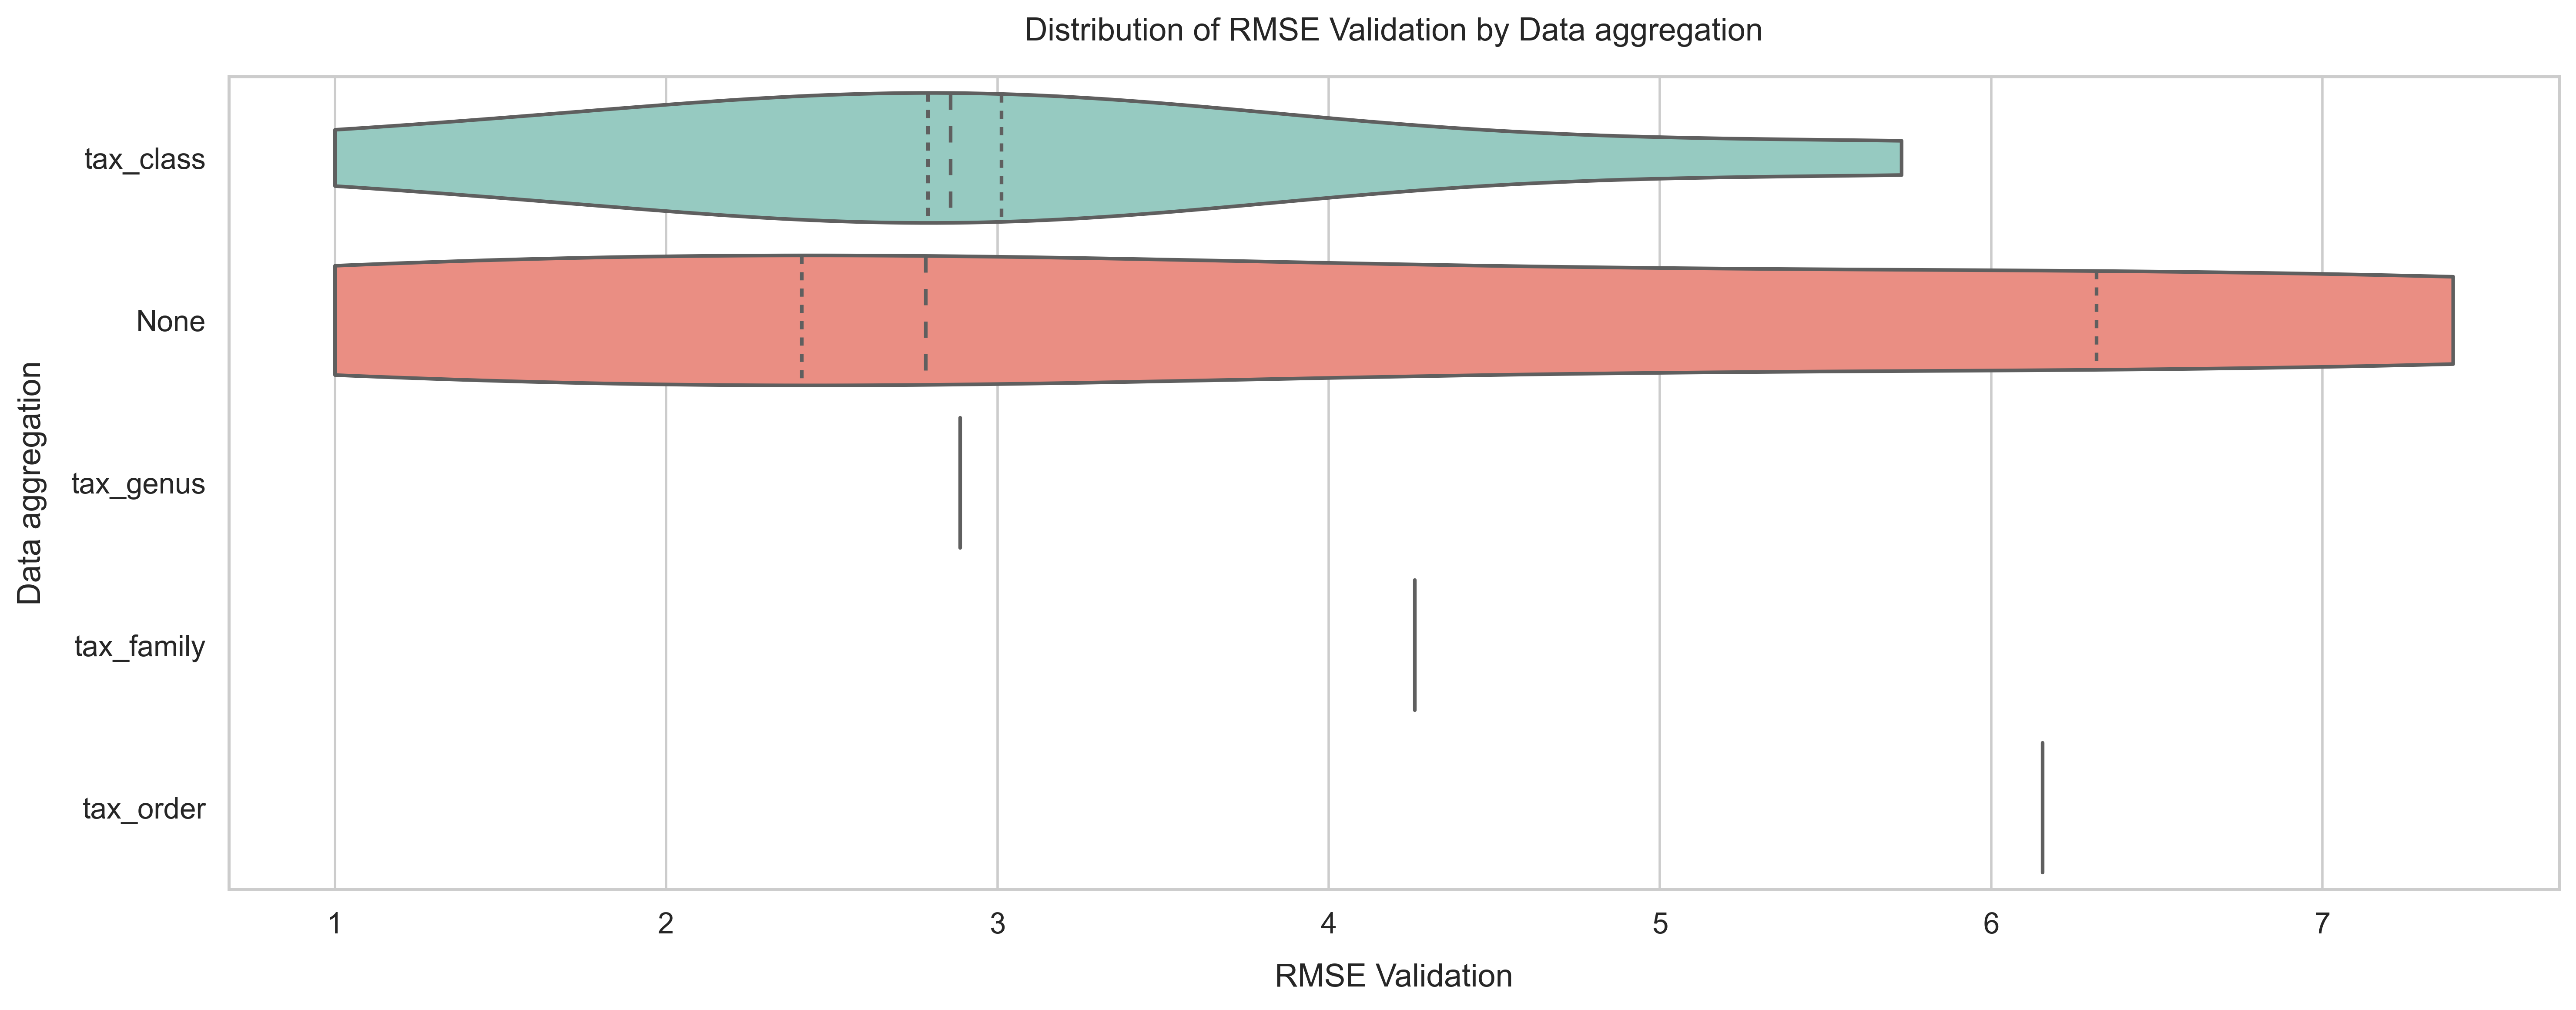

In [17]:
violinplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
)

In [18]:
parallel_coordinates_plot(all_trials, var, var_name, first_metric_cat=True)

## Training over time

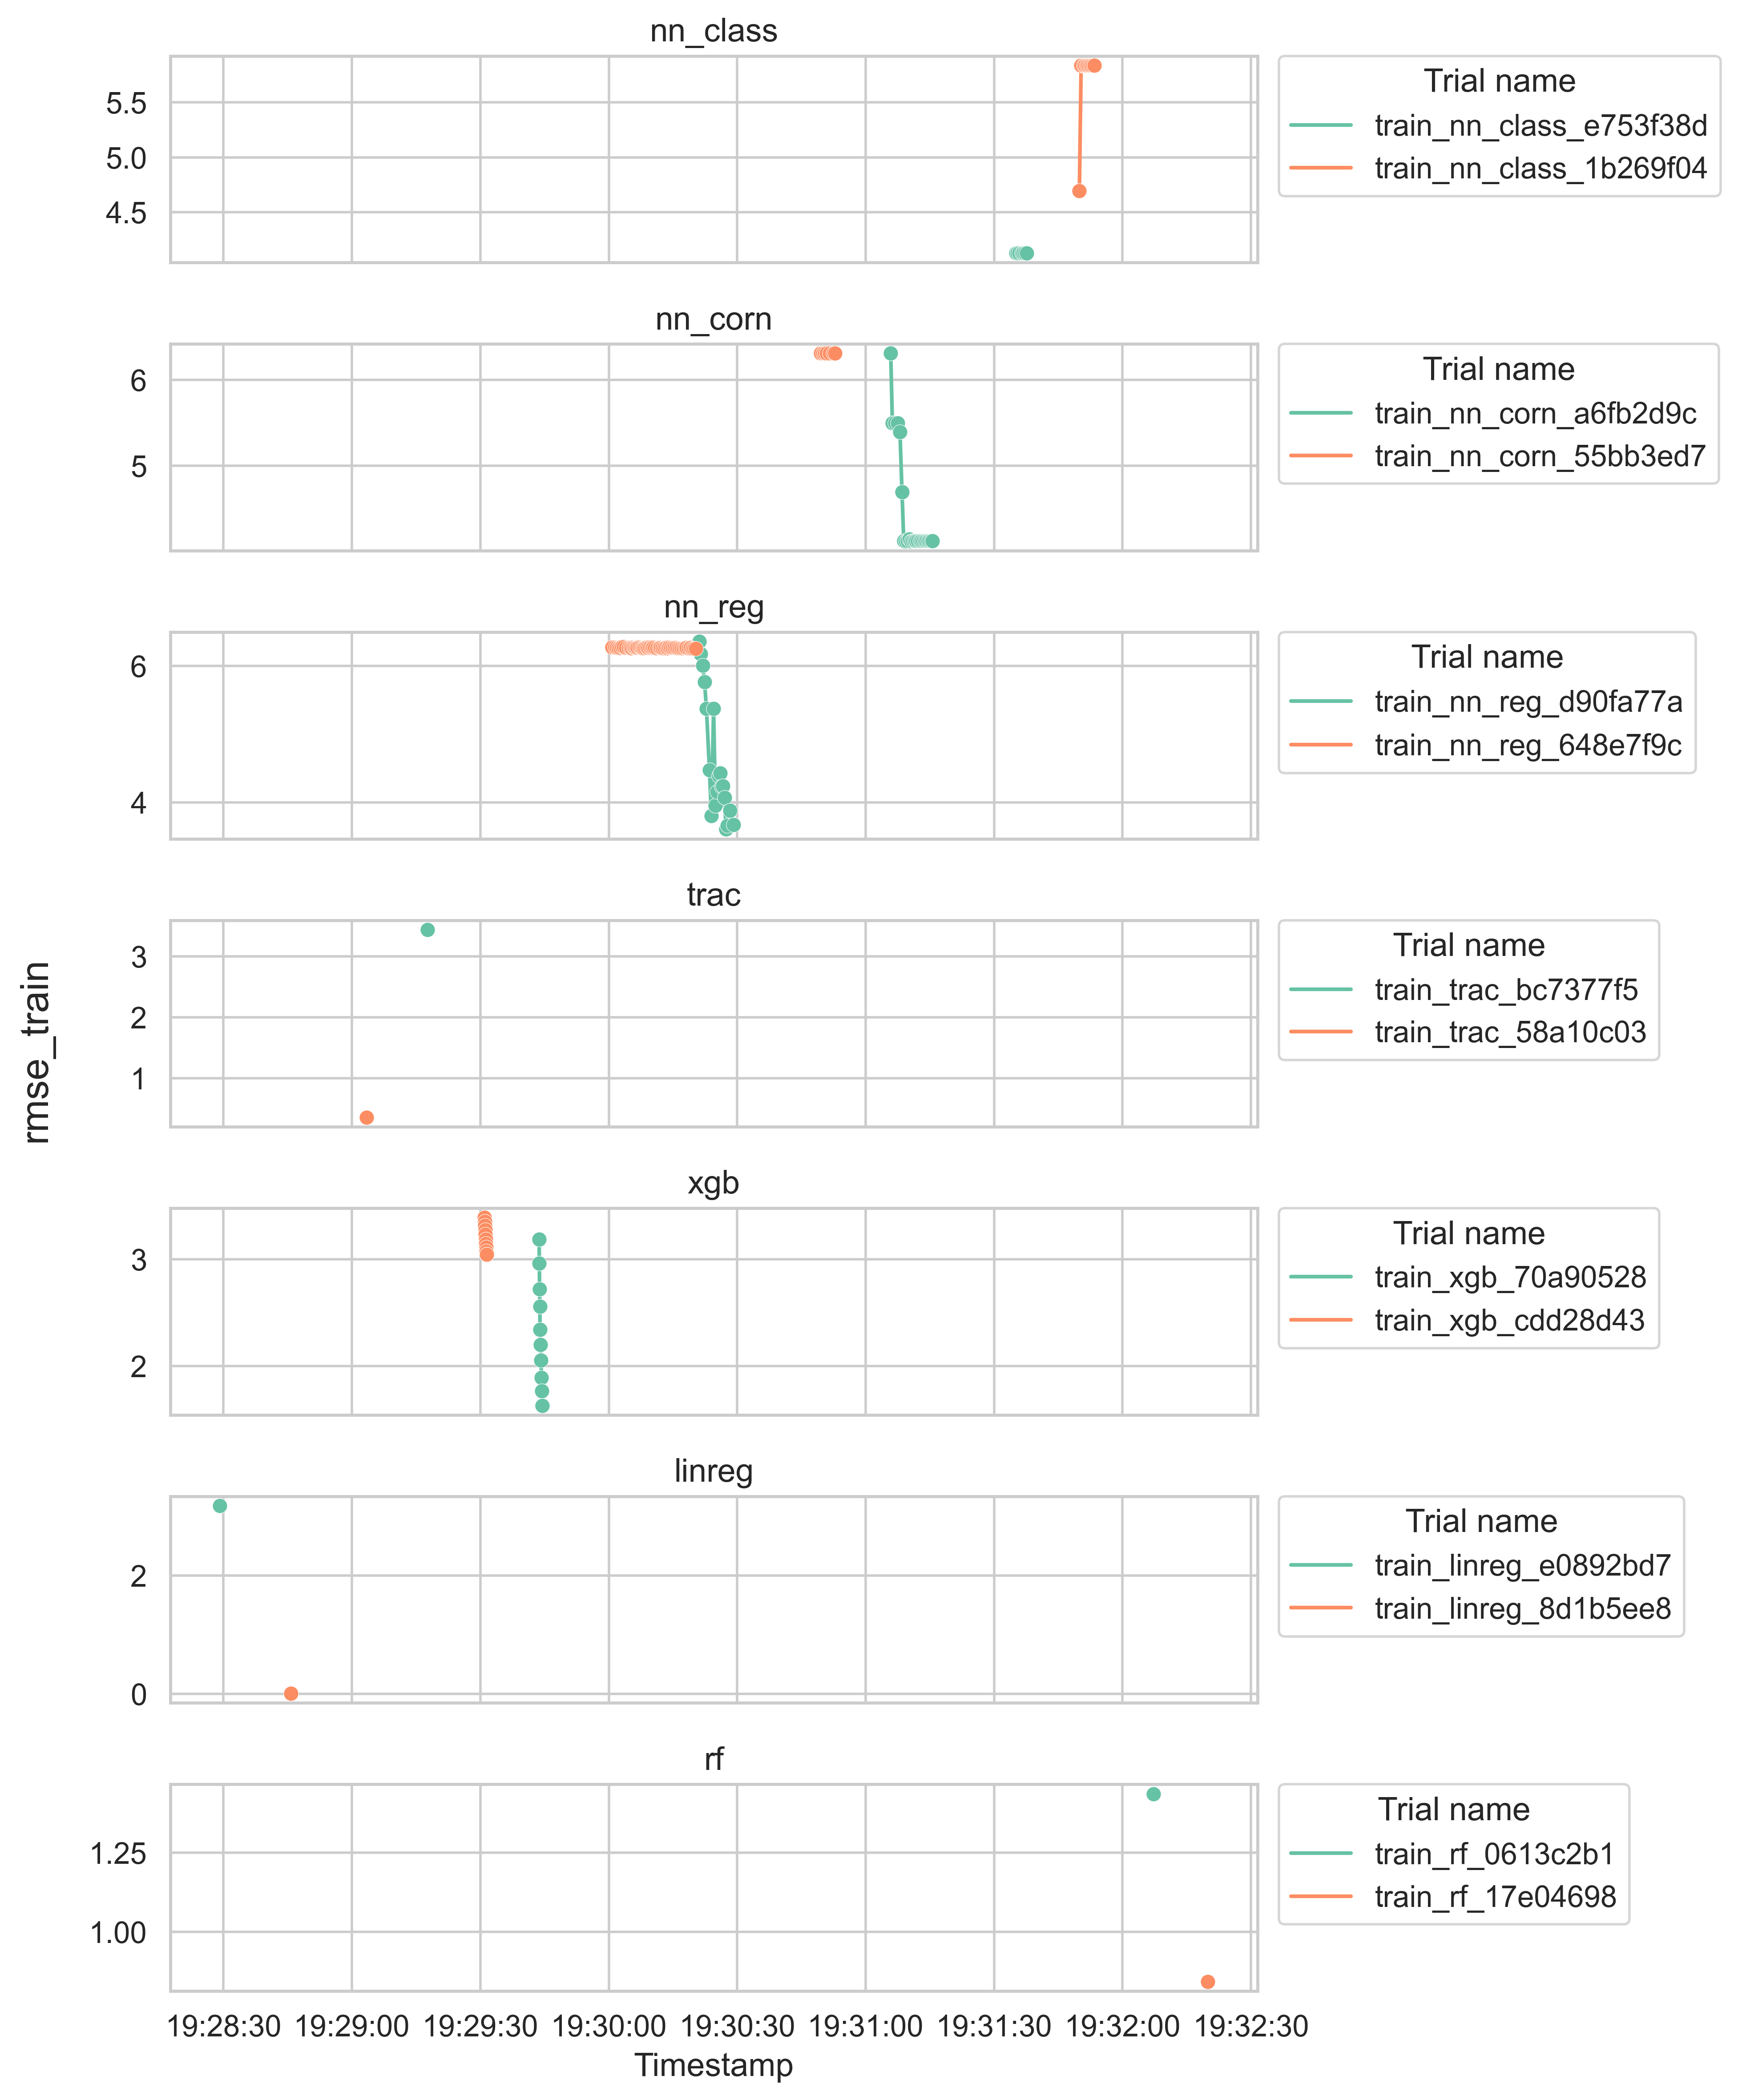

In [19]:
metric = "rmse_train"
client = mlflow.tracking.MlflowClient(tracking_uri=log_folder_location)

plot_metric_history_per_model_type(metric, client, all_trials)

* If per model type later launched trials yield smaller RMSE train then the selected search algorithm works

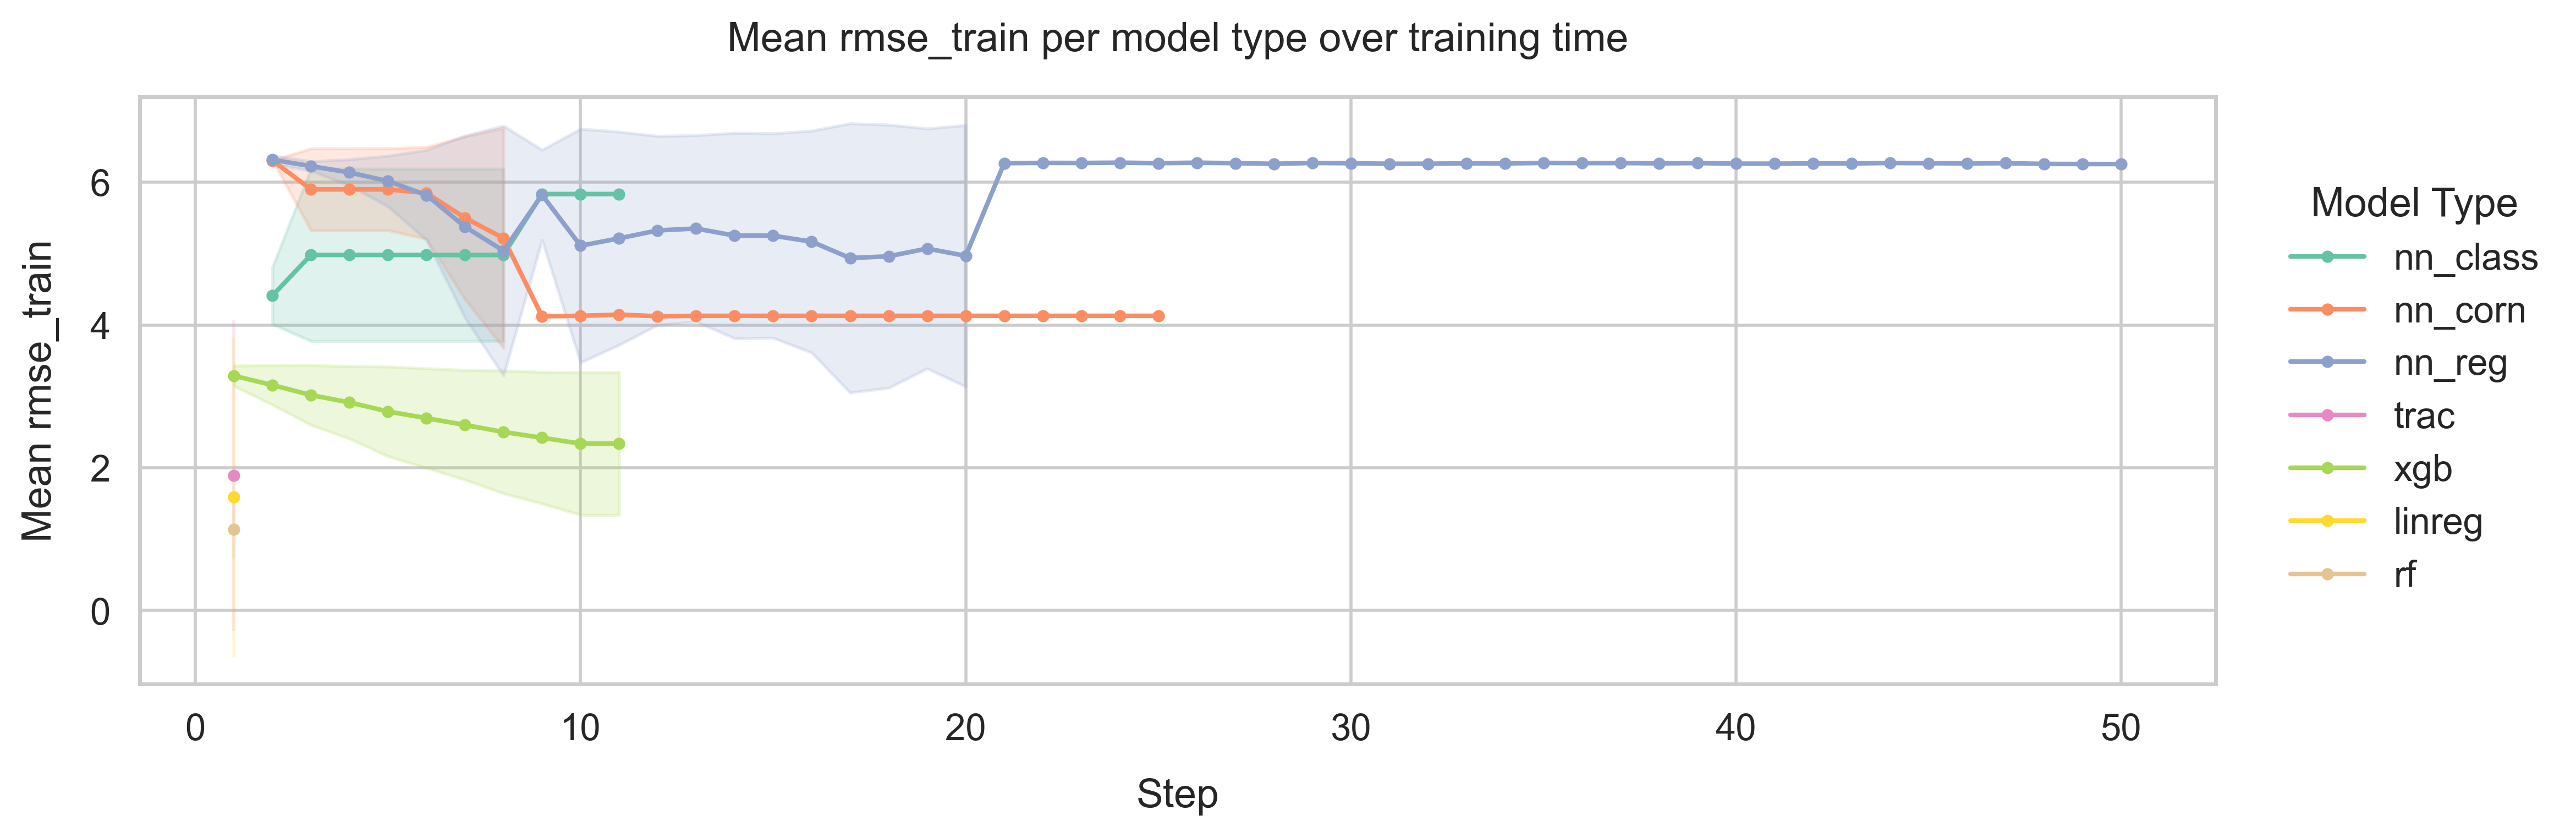

In [20]:
plot_avg_history_per_model_type("rmse_train", client, all_trials)

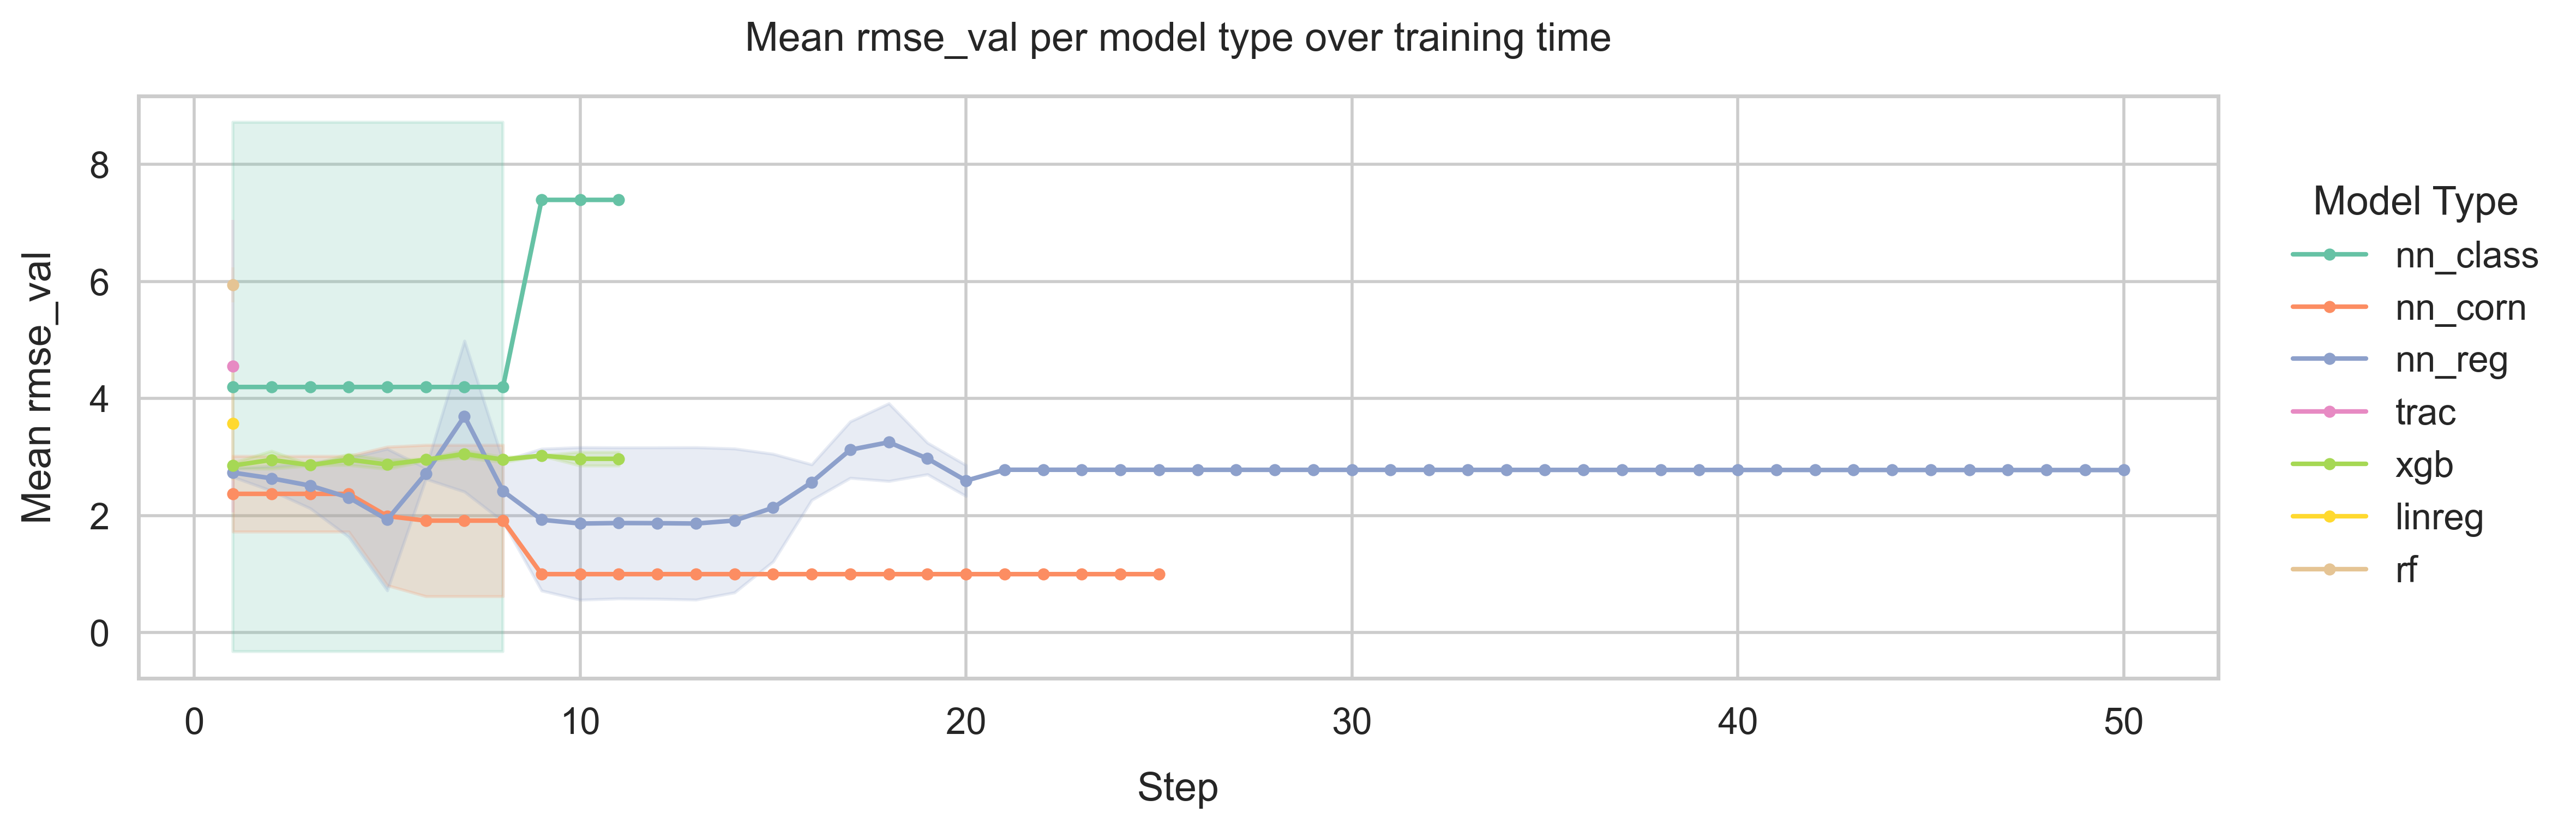

In [21]:
plot_avg_history_per_model_type("rmse_val", client, all_trials)

## Run configuration overview

In [22]:
run_config = extract_run_config(all_trials)
run_config

run_id       experiment_id  \
0   cb331c66f7d34fb5833d326bf264e031  690790892027979844   
1   91d88b155f70449f9db22006e952deca  936527165968880587   
2   3d8c0697291245a7ae4281679cc789f7  716998707276705007   
3   0328725e51a44089bfa867792ab3d19d  716998707276705007   
4   08b8eb27bac942cdaa55522a4c2646e1  892352171282450680   
5   30bc596d7d9a4542b3fd0db5ee95f2ac  936527165968880587   
6   698e7646d9cc4e65b343dc18edf418ae  547091183369001828   
7   88b4c74f111f4fb2a2a68589fcc3a5f0  909086025355370038   
8   029d4f7e13844e22ae165b0962f7141d  547091183369001828   
9   9a27a55cd68f4c74a4ec586c1391832a  909086025355370038   
10  a931963a09e24dc6ad0581d327826d97  754425784424763506   
11  51aa55a14cdc4d748d650e9b754d117c  754425784424763506   
12  23f7d800ffb7472c928af3e5b7f50b96  892352171282450680   
13  87cf5afa128a4bddb34ebcf5f01725dd  690790892027979844   

                         start_time                         end_time  \
0  2025-06-08 19:31:32.709000+00:00 2025-06-08 19:31:37.746000+00:00   
1  2025-06-08 19:31:03.525000+00:00 2025-06-08 19:31:15.792000+00:00   
2  2025-06-08 19:30:18.348000+00:00 2025-06-08 19:30:29.319000+00:00   
3  2025-06-08 19:29:57.839000+00:00 2025-06-08 19:30:20.485000+00:00   
4  2025-06-08 19:29:15.879000+00:00 2025-06-08 19:29:17.652000+00:00   
5  2025-06-08 19:30:46.467000+00:00 2025-06-08 19:30:52.932000+00:00   
6  2025-06-08 19:29:43.611000+00:00 2025-06-08 19:29:44.491000+00:00   
7  2025-06-08 19:28:29.001000+00:00 2025-06-08 19:28:29.191000+00:00   
8  2025-06-08 19:29:30.820000+00:00 2025-06-08 19:29:31.577000+00:00   
9  2025-06-08 19:28:45.578000+00:00 2025-06-08 19:28:45.756000+00:00   
10 2025-06-08 19:32:06.632000+00:00 2025-06-08 19:32:07.290000+00:00   
11 2025-06-08 19:32:19.800000+00:00 2025-06-08 19:32:20.012000+00:00   
12 2025-06-08 19:29:01.383000+00:00 2025-06-08 19:29:03.475000+00:00   
13 2025-06-08 19:31:47.718000+00:00 2025-06-08 19:31:53.606000+00:00   

    metrics.config/early_stopping_patience  metrics.loss_train  \
0                                      7.0            1.619358   
1                                     10.0            0.213165   
2                                     10.0           13.500510   
3                                      7.0           39.123829   
4                                      NaN                 NaN   
5                                      7.0            0.688963   
6                                      NaN                 NaN   
7                                      NaN                 NaN   
8                                      NaN                 NaN   
9                                      NaN                 NaN   
10                                     NaN                 NaN   
11                                     NaN                 NaN   
12                                     NaN                 NaN   
13                                    10.0            1.515290   

    metrics.nb_features  metrics.pid  metrics.config/data_selection_i  \
0                   1.0      18330.0                              1.0   
1                  20.0      18112.0                             19.0   
2                  20.0      17766.0                             19.0   
3                   1.0      17717.0                              1.0   
4                   1.0      17658.0                              NaN   
5                   1.0      18097.0                              1.0   
6                  91.0      17699.0                              NaN   
7                   1.0      17567.0                              1.0   
8                   1.0      17679.0                              1.0   
9                  24.0      17590.0                              NaN   
10                  1.0      18459.0                              1.0   
11                 64.0      18488.0                              NaN   
12                 15.0      17619.0                              NaN   
13                 20.0      18351.